In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [18]:
df_train= pd.read_csv(r"E:\MSDS\MSDS-1\Tools & Tech\Final Project\dengue_features_train.csv")
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [19]:
new_df_train = df_train.copy()
new_df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [20]:
new_df_train= new_df_train.reindex(np.random.permutation(new_df_train.index))
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,32.00,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,17.94,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,26.10,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,13.90,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,12.20,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8


In [21]:
df_labels = pd.read_csv(r"E:\MSDS\MSDS-1\Tools & Tech\Final Project\dengue_labels_train.csv")

In [22]:
df_train = pd.concat([df_train, df_labels["total_cases"]], axis=1)

In [23]:
df_train.shape

(1456, 25)

In [24]:
df_train.keys()

Index(['city', 'year', 'weekofyear', 'week_start_date', 'ndvi_ne', 'ndvi_nw',
       'ndvi_se', 'ndvi_sw', 'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [25]:
df_train.isnull().any()

city                                     False
year                                     False
weekofyear                               False
week_start_date                          False
ndvi_ne                                   True
ndvi_nw                                   True
ndvi_se                                   True
ndvi_sw                                   True
precipitation_amt_mm                      True
reanalysis_air_temp_k                     True
reanalysis_avg_temp_k                     True
reanalysis_dew_point_temp_k               True
reanalysis_max_air_temp_k                 True
reanalysis_min_air_temp_k                 True
reanalysis_precip_amt_kg_per_m2           True
reanalysis_relative_humidity_percent      True
reanalysis_sat_precip_amt_mm              True
reanalysis_specific_humidity_g_per_kg     True
reanalysis_tdtr_k                         True
station_avg_temp_c                        True
station_diur_temp_rng_c                   True
station_max_t

In [26]:
df_train.isnull().sum()

city                                       0
year                                       0
weekofyear                                 0
week_start_date                            0
ndvi_ne                                  194
ndvi_nw                                   52
ndvi_se                                   22
ndvi_sw                                   22
precipitation_amt_mm                      13
reanalysis_air_temp_k                     10
reanalysis_avg_temp_k                     10
reanalysis_dew_point_temp_k               10
reanalysis_max_air_temp_k                 10
reanalysis_min_air_temp_k                 10
reanalysis_precip_amt_kg_per_m2           10
reanalysis_relative_humidity_percent      10
reanalysis_sat_precip_amt_mm              13
reanalysis_specific_humidity_g_per_kg     10
reanalysis_tdtr_k                         10
station_avg_temp_c                        43
station_diur_temp_rng_c                   43
station_max_temp_c                        20
station_mi

In [27]:
type(df_train["ndvi_ne"].head()[1])

numpy.float64

In [34]:
df_train["ndvi_ne"] = df_train["ndvi_ne"].fillna(df_train["ndvi_ne"].mean())
df_train["ndvi_nw"] = df_train["ndvi_nw"].fillna(df_train["ndvi_nw"].mean())
df_train["ndvi_se"] = df_train["ndvi_se"].fillna(df_train["ndvi_se"].mean())
df_train["ndvi_sw"] = df_train["ndvi_sw"].fillna(df_train["ndvi_sw"].mean())
df_train["precipitation_amt_mm"] = df_train["precipitation_amt_mm"].fillna(df_train["precipitation_amt_mm"].mean())
df_train["reanalysis_air_temp_k"] = df_train["reanalysis_air_temp_k"].fillna(df_train["reanalysis_air_temp_k"].mean())
df_train["reanalysis_avg_temp_k"] = df_train["reanalysis_avg_temp_k"].fillna(df_train["reanalysis_avg_temp_k"].mean())
df_train["reanalysis_dew_point_temp_k"] = df_train["reanalysis_dew_point_temp_k"].fillna(df_train["reanalysis_dew_point_temp_k"].mean())
df_train["reanalysis_max_air_temp_k"] = df_train["reanalysis_max_air_temp_k"].fillna(df_train["reanalysis_max_air_temp_k"].mean())
df_train["reanalysis_min_air_temp_k"] = df_train["reanalysis_min_air_temp_k"].fillna(df_train["reanalysis_min_air_temp_k"].mean())
df_train["reanalysis_precip_amt_kg_per_m2"] = df_train["reanalysis_precip_amt_kg_per_m2"].fillna(df_train["reanalysis_precip_amt_kg_per_m2"].mean())
df_train["reanalysis_relative_humidity_percent"] = df_train["reanalysis_relative_humidity_percent"].fillna(df_train["reanalysis_relative_humidity_percent"].mean())
df_train["reanalysis_sat_precip_amt_mm"] = df_train["reanalysis_sat_precip_amt_mm"].fillna(df_train["reanalysis_sat_precip_amt_mm"].mean())
df_train["reanalysis_specific_humidity_g_per_kg"] = df_train["reanalysis_specific_humidity_g_per_kg"].fillna(df_train["reanalysis_specific_humidity_g_per_kg"].mean())
df_train["reanalysis_tdtr_k"] = df_train["reanalysis_tdtr_k"].fillna(df_train["reanalysis_tdtr_k"].mean())
df_train["station_avg_temp_c"] = df_train["station_avg_temp_c"].fillna(df_train["station_avg_temp_c"].mean())
df_train["station_diur_temp_rng_c"] = df_train["station_diur_temp_rng_c"].fillna(df_train["station_diur_temp_rng_c"].mean())
df_train["station_max_temp_c"] = df_train["station_max_temp_c"].fillna(df_train["station_max_temp_c"].mean())
df_train["station_min_temp_c"] = df_train["station_min_temp_c"].fillna(df_train["station_min_temp_c"].mean())
df_train["station_precip_mm"] = df_train["station_precip_mm"].fillna(df_train["station_precip_mm"].mean())

In [28]:
df_train = df_train.fillna(df_train.mean())

In [35]:
df_train.isnull().sum()

city                                     0
year                                     0
weekofyear                               0
week_start_date                          0
ndvi_ne                                  0
ndvi_nw                                  0
ndvi_se                                  0
ndvi_sw                                  0
precipitation_amt_mm                     0
reanalysis_air_temp_k                    0
reanalysis_avg_temp_k                    0
reanalysis_dew_point_temp_k              0
reanalysis_max_air_temp_k                0
reanalysis_min_air_temp_k                0
reanalysis_precip_amt_kg_per_m2          0
reanalysis_relative_humidity_percent     0
reanalysis_sat_precip_amt_mm             0
reanalysis_specific_humidity_g_per_kg    0
reanalysis_tdtr_k                        0
station_avg_temp_c                       0
station_diur_temp_rng_c                  0
station_max_temp_c                       0
station_min_temp_c                       0
station_pre

In [37]:
df_train.isnull().head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [38]:

df_train.describe().keys()

Index(['year', 'weekofyear', 'ndvi_ne', 'ndvi_nw', 'ndvi_se', 'ndvi_sw',
       'precipitation_amt_mm', 'reanalysis_air_temp_k',
       'reanalysis_avg_temp_k', 'reanalysis_dew_point_temp_k',
       'reanalysis_max_air_temp_k', 'reanalysis_min_air_temp_k',
       'reanalysis_precip_amt_kg_per_m2',
       'reanalysis_relative_humidity_percent', 'reanalysis_sat_precip_amt_mm',
       'reanalysis_specific_humidity_g_per_kg', 'reanalysis_tdtr_k',
       'station_avg_temp_c', 'station_diur_temp_rng_c', 'station_max_temp_c',
       'station_min_temp_c', 'station_precip_mm', 'total_cases'],
      dtype='object')

In [39]:
df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
0,sj,1990,18,1990-04-30,0.122600,0.103725,0.198483,0.177617,12.42,297.572857,...,73.365714,12.42,14.012857,2.628571,25.442857,6.900000,29.4,20.0,16.0,4
1,sj,1990,19,1990-05-07,0.169900,0.142175,0.162357,0.155486,22.82,298.211429,...,77.368571,22.82,15.372857,2.371429,26.714286,6.371429,31.7,22.2,8.6,5
2,sj,1990,20,1990-05-14,0.032250,0.172967,0.157200,0.170843,34.54,298.781429,...,82.052857,34.54,16.848571,2.300000,26.714286,6.485714,32.2,22.8,41.4,4
3,sj,1990,21,1990-05-21,0.128633,0.245067,0.227557,0.235886,15.36,298.987143,...,80.337143,15.36,16.672857,2.428571,27.471429,6.771429,33.3,23.3,4.0,3
4,sj,1990,22,1990-05-28,0.196200,0.262200,0.251200,0.247340,7.52,299.518571,...,80.460000,7.52,17.210000,3.014286,28.942857,9.371429,35.0,23.9,5.8,6


In [40]:
new_df_train = df_train.reindex(np.random.permutation(df_train.index))

In [41]:
new_df_train.head()

,city,year,weekofyear,week_start_date,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,total_cases
50,sj,1991,16,1991-04-16,0.077400,0.102400,0.163550,0.206167,44.57,297.284286,...,73.351429,44.57,13.732857,2.014286,25.514286,6.271429,29.4,21.1,19.4,23
1335,iq,2008,10,2008-03-04,0.169743,0.138667,0.170057,0.200843,210.83,297.754286,...,88.972857,210.83,17.064286,8.957143,27.180000,8.880000,33.3,21.9,119.6,23
73,sj,1991,39,1991-09-24,0.167600,0.148900,0.171429,0.218143,73.55,300.060000,...,81.424286,73.55,18.044286,2.071429,28.142857,6.685714,32.8,24.4,31.8,92
537,sj,2000,34,2000-08-26,0.215667,0.154233,0.198867,0.182871,27.40,300.468571,...,79.558571,27.40,18.038571,2.828571,28.728571,6.600000,32.8,23.9,13.7,2
923,sj,2008,5,2008-01-29,0.142294,-0.135400,0.223300,0.170943,0.00,298.021429,...,73.565714,0.00,14.408571,3.300000,24.571429,6.442857,28.9,20.0,3.1,9


In [42]:
new_df_train.city.unique()
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
new_df_train["city"] = encoder.fit_transform(new_df_train["city"])

In [43]:
sorted(new_df_train.year.unique(), )

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010]

In [44]:
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 50 to 507
Data columns (total 25 columns):
city                                     1456 non-null int32
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
week_start_date                          1456 non-null object
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_

In [45]:
from datetime import datetime
seasons = [0,0,1,1,1,2,2,2,3,3,3,0]
new_df_train["seasons"] = new_df_train["week_start_date"].apply(lambda x: seasons[(datetime.strptime(x, "%Y-%m-%d").month-1)])

In [46]:
from sklearn import tree
new_df_train = new_df_train.drop("week_start_date", axis=1)

In [47]:
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 50 to 507
Data columns (total 25 columns):
city                                     1456 non-null int32
year                                     1456 non-null int64
weekofyear                               1456 non-null int64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_relati

In [48]:
new_df_train.city = new_df_train.city.astype("float64")
new_df_train.year = new_df_train.year.astype("float64")
new_df_train.weekofyear = new_df_train.weekofyear.astype("float64")
new_df_train.seasons = new_df_train.seasons.astype("float64")

In [49]:
new_df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 50 to 507
Data columns (total 25 columns):
city                                     1456 non-null float64
year                                     1456 non-null float64
weekofyear                               1456 non-null float64
ndvi_ne                                  1456 non-null float64
ndvi_nw                                  1456 non-null float64
ndvi_se                                  1456 non-null float64
ndvi_sw                                  1456 non-null float64
precipitation_amt_mm                     1456 non-null float64
reanalysis_air_temp_k                    1456 non-null float64
reanalysis_avg_temp_k                    1456 non-null float64
reanalysis_dew_point_temp_k              1456 non-null float64
reanalysis_max_air_temp_k                1456 non-null float64
reanalysis_min_air_temp_k                1456 non-null float64
reanalysis_precip_amt_kg_per_m2          1456 non-null float64
reanalysis_

In [50]:
y_df_vals = new_df_train["total_cases"].copy()

In [51]:
x_df_vals = new_df_train.drop("total_cases", axis=1)

In [52]:
x_vals = x_df_vals.values
y_vals = y_df_vals.values

In [53]:
y_vals = y_vals.reshape(y_vals.shape[0], 1)

In [54]:
dengTreeModel = tree.DecisionTreeRegressor(criterion="mae", splitter="best", random_state=40)
dengTreeModel.fit(x_vals, y_vals)

DecisionTreeRegressor(criterion='mae', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=40, splitter='best')

In [55]:
den_test_df = pd.read_csv(r"E:\MSDS\MSDS-1\Tools & Tech\Final Project\dengue_features_test.csv")
den_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 24 columns):
city                                     416 non-null object
year                                     416 non-null int64
weekofyear                               416 non-null int64
week_start_date                          416 non-null object
ndvi_ne                                  373 non-null float64
ndvi_nw                                  405 non-null float64
ndvi_se                                  415 non-null float64
ndvi_sw                                  415 non-null float64
precipitation_amt_mm                     414 non-null float64
reanalysis_air_temp_k                    414 non-null float64
reanalysis_avg_temp_k                    414 non-null float64
reanalysis_dew_point_temp_k              414 non-null float64
reanalysis_max_air_temp_k                414 non-null float64
reanalysis_min_air_temp_k                414 non-null float64
reanalysis_precip_amt_kg_per_m2  

In [56]:
den_test_df["seasons"] = den_test_df["week_start_date"].apply(lambda x : seasons[datetime.strptime(x, "%Y-%m-%d").month-1])

In [57]:
den_test_df["city"][den_test_df["city"] == "sj"] = 1
den_test_df["city"][den_test_df["city"] == "iq"] = 0

C:\Users\Kazmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Kazmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [58]:
den_test_df.city = den_test_df.city.astype("float64")
den_test_df.year = den_test_df.year.astype("float64")
den_test_df.weekofyear = den_test_df.weekofyear.astype("float64")
den_test_df.seasons = den_test_df.seasons.astype("float64")

In [59]:
den_test_df = den_test_df.drop("week_start_date", axis=1)

In [60]:
den_test_df.isnull().sum()

city                                      0
year                                      0
weekofyear                                0
ndvi_ne                                  43
ndvi_nw                                  11
ndvi_se                                   1
ndvi_sw                                   1
precipitation_amt_mm                      2
reanalysis_air_temp_k                     2
reanalysis_avg_temp_k                     2
reanalysis_dew_point_temp_k               2
reanalysis_max_air_temp_k                 2
reanalysis_min_air_temp_k                 2
reanalysis_precip_amt_kg_per_m2           2
reanalysis_relative_humidity_percent      2
reanalysis_sat_precip_amt_mm              2
reanalysis_specific_humidity_g_per_kg     2
reanalysis_tdtr_k                         2
station_avg_temp_c                       12
station_diur_temp_rng_c                  12
station_max_temp_c                        3
station_min_temp_c                        9
station_precip_mm               

In [61]:
den_test_df["ndvi_ne"] = den_test_df["ndvi_ne"].fillna(den_test_df["ndvi_ne"].mean())
den_test_df["ndvi_nw"] = den_test_df["ndvi_nw"].fillna(den_test_df["ndvi_nw"].mean())
den_test_df["ndvi_se"] = den_test_df["ndvi_se"].fillna(den_test_df["ndvi_se"].mean())
den_test_df["ndvi_sw"] = den_test_df["ndvi_sw"].fillna(den_test_df["ndvi_sw"].mean())
den_test_df["precipitation_amt_mm"] = den_test_df["precipitation_amt_mm"].fillna(den_test_df["precipitation_amt_mm"].mean())
den_test_df["reanalysis_air_temp_k"] = den_test_df["reanalysis_air_temp_k"].fillna(den_test_df["reanalysis_air_temp_k"].mean())
den_test_df["reanalysis_avg_temp_k"] = den_test_df["reanalysis_avg_temp_k"].fillna(den_test_df["reanalysis_avg_temp_k"].mean())
den_test_df["reanalysis_dew_point_temp_k"] = den_test_df["reanalysis_dew_point_temp_k"].fillna(den_test_df["reanalysis_dew_point_temp_k"].mean())
den_test_df["reanalysis_max_air_temp_k"] = den_test_df["reanalysis_max_air_temp_k"].fillna(den_test_df["reanalysis_max_air_temp_k"].mean())
den_test_df["reanalysis_min_air_temp_k"] = den_test_df["reanalysis_min_air_temp_k"].fillna(den_test_df["reanalysis_min_air_temp_k"].mean())
den_test_df["reanalysis_precip_amt_kg_per_m2"] = den_test_df["reanalysis_precip_amt_kg_per_m2"].fillna(den_test_df["reanalysis_precip_amt_kg_per_m2"].mean())
den_test_df["reanalysis_relative_humidity_percent"] = den_test_df["reanalysis_relative_humidity_percent"].fillna(den_test_df["reanalysis_relative_humidity_percent"].mean())
den_test_df["reanalysis_sat_precip_amt_mm"] = den_test_df["reanalysis_sat_precip_amt_mm"].fillna(den_test_df["reanalysis_sat_precip_amt_mm"].mean())
den_test_df["reanalysis_specific_humidity_g_per_kg"] = den_test_df["reanalysis_specific_humidity_g_per_kg"].fillna(den_test_df["reanalysis_specific_humidity_g_per_kg"].mean())
den_test_df["reanalysis_tdtr_k"] = den_test_df["reanalysis_tdtr_k"].fillna(den_test_df["reanalysis_tdtr_k"].mean())
den_test_df["station_avg_temp_c"] = den_test_df["station_avg_temp_c"].fillna(den_test_df["station_avg_temp_c"].mean())
den_test_df["station_diur_temp_rng_c"] = den_test_df["station_diur_temp_rng_c"].fillna(den_test_df["station_diur_temp_rng_c"].mean())
den_test_df["station_max_temp_c"] = den_test_df["station_max_temp_c"].fillna(den_test_df["station_max_temp_c"].mean())
den_test_df["station_min_temp_c"] = den_test_df["station_min_temp_c"].fillna(den_test_df["station_min_temp_c"].mean())
den_test_df["station_precip_mm"] = den_test_df["station_precip_mm"].fillna(den_test_df["station_precip_mm"].mean())

In [62]:
den_test_preds = dengTreeModel.predict(x_df_vals.values)

In [63]:
den_test_preds = den_test_preds.astype(int)
mean_absolute_error(y_vals, den_test_preds)

0.0

In [64]:
from sklearn.metrics import accuracy_score

In [65]:
den_test_preds = den_test_preds.reshape(den_test_preds.shape[0], 1)

In [66]:
den_test_preds.shape

(1456, 1)

In [83]:
from sklearn.externals.six import StringIO   
from IPython.display import Image
import pydotplus
from sklearn import tree

dot_data = StringIO()
tree.export_graphviz(dengTreeModel, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
image = Image(graph.create_png())

InvocationException: GraphViz's executables not found

In [ ]:
graph.write_png("E:/MSDS/MSDS-1/Tools & Tech/Final Project/den_image.png")

In [84]:
dengSVCModel = SVC(decision_function_shape="ovr", probability=True)
dengSVCModel.fit(x_vals, y_vals)

C:\Users\Kazmi\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Kazmi\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [85]:
mean_absolute_error(y_vals, dengSVCModel.predict(x_vals))

0.8578296703296703

In [86]:
test_preds_svc = dengSVCModel.predict(den_test_df)

In [87]:
test_preds_tree = dengTreeModel.predict(den_test_df)

In [88]:
from sklearn.ensemble import RandomForestRegressor

In [89]:
dengRFCModel = RandomForestRegressor(criterion="mae", random_state=40)
dengRFCModel.fit(x_vals, y_vals)

C:\Users\Kazmi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Kazmi\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=40, verbose=0, warm_start=False)

In [90]:
dengRFCModel.score(x_vals, y_vals)

0.8969748252508885

In [91]:
dengTreeModel.score(x_vals, y_vals)

1.0

In [92]:
dengSVCModel.score(x_vals, y_vals)

0.9759615384615384

In [93]:
test_preds_rfc = dengRFCModel.predict(den_test_df)

In [94]:
dengRFCModel.feature_importances_

array([1.49042559e-04, 2.45204299e-01, 1.20962754e-01, 2.18916945e-02,
       2.63393612e-02, 2.43831621e-02, 3.01127922e-02, 1.55896959e-02,
       3.54586082e-02, 2.75246783e-02, 3.72805018e-02, 2.52313167e-02,
       5.88674635e-02, 4.19922632e-02, 4.02447615e-02, 1.19494030e-02,
       2.95227466e-02, 4.16729555e-02, 3.33659792e-02, 3.68477980e-02,
       3.20124869e-02, 2.54984994e-02, 2.67848322e-02, 1.11129039e-02])

Text(0, 0.5, 'actual cases')

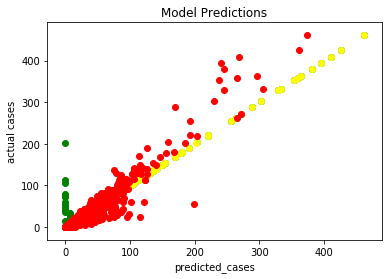

In [95]:
plt.scatter(dengSVCModel.predict(x_vals), y_vals, c="green")
plt.scatter(dengTreeModel.predict(x_vals), y_vals, c="yellow")
plt.scatter(dengRFCModel.predict(x_vals), y_vals, c="red")
plt.title("Model Predictions")
plt.xlabel("predicted_cases")
plt.ylabel("actual cases")

In [96]:
ori_test_df = pd.read_csv(r"E:\MSDS\MSDS-1\Tools & Tech\Final Project\dengue_features_test.csv")
ori_test_df = ori_test_df.loc[:,["city", "year", "weekofyear"]]

In [97]:
test_preds_svc_df = pd.DataFrame(data = test_preds_svc, columns=["total_cases"])
test_preds_rfc_df = pd.DataFrame(data=test_preds_rfc, columns = ["total_cases"])
test_preds_tree_df = pd.DataFrame(data=test_preds_tree, columns=["total_cases"])

In [98]:
svc_gen_csv = pd.concat([ori_test_df, test_preds_svc_df], axis=1)
rfc_gen_csv = pd.concat([ori_test_df, test_preds_rfc_df], axis=1)
tree_gen_csv = pd.concat([ori_test_df, test_preds_tree_df], axis=1)

In [99]:
svc_gen_csv.total_cases = svc_gen_csv.total_cases.astype(int)

In [100]:
svc_gen_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,0
1,sj,2008,19,0
2,sj,2008,20,0
3,sj,2008,21,0
4,sj,2008,22,0


In [101]:
rfc_gen_csv.total_cases = rfc_gen_csv.total_cases.astype(int)
tree_gen_csv.total_cases = tree_gen_csv.total_cases.astype(int)

In [102]:
rfc_gen_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,4
1,sj,2008,19,5
2,sj,2008,20,3
3,sj,2008,21,8
4,sj,2008,22,9


In [103]:
tree_gen_csv.head()

,city,year,weekofyear,total_cases
0,sj,2008,18,1
1,sj,2008,19,3
2,sj,2008,20,4
3,sj,2008,21,4
4,sj,2008,22,21


In [104]:
den_test_df.head()

,city,year,weekofyear,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,...,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm,seasons
0,1.0,2008.0,18.0,-0.01890,-0.018900,0.102729,0.091200,78.60,298.492857,298.550000,...,78.781429,78.60,15.918571,3.128571,26.528571,7.057143,33.3,21.7,75.2,1.0
1,1.0,2008.0,19.0,-0.01800,-0.012400,0.082043,0.072314,12.56,298.475714,298.557143,...,78.230000,12.56,15.791429,2.571429,26.071429,5.557143,30.0,22.2,34.3,1.0
2,1.0,2008.0,20.0,-0.00150,0.126803,0.151083,0.091529,3.66,299.455714,299.357143,...,78.270000,3.66,16.674286,4.428571,27.928571,7.785714,32.8,22.8,3.0,1.0
3,1.0,2008.0,21.0,0.12605,-0.019867,0.124329,0.125686,0.00,299.690000,299.728571,...,73.015714,0.00,15.775714,4.342857,28.057143,6.271429,33.3,24.4,0.3,1.0
4,1.0,2008.0,22.0,0.05680,0.039833,0.062267,0.075914,0.76,299.780000,299.671429,...,74.084286,0.76,16.137143,3.542857,27.614286,7.085714,33.3,23.3,84.1,1.0


In [105]:
svc_gen_csv.to_csv("C:/Users/Kazmi/svc_preds.csv", sep=",", index=False)


In [107]:
rfc_gen_csv.to_csv("C:/Users/Kazmi/rfc_preds.csv", sep=",", index=False)
tree_gen_csv.to_csv("C:/Users/Kazmi/tree_preds.csv", sep=",", index=False)